**Technocolabs Mini Project: Bigmart Sales Dataset**



**Name: Shazia Mehatab Shaik**

**Table of Contents**

# 1. Introduction
# 2.  Data Id
# 3. Libraries
# 4. File path
# 5. Preprocessing and Data Analysis
# 6. Machine learning models
# 7. Conclusion

**Introducion**

**Problem Statement:**
The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

**Breakdown of the Problem Statement:**
Supervised machine learning problem.
The target value will be Item_Outlet_Sales.

**Aim of the NoteBook:**
The objective is to create a model that can predict the sales per product for each store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**Data Id 📋**

This dataset is named [BigMart Sales]. The dataset contains a set of 8,523 records under 12 attributes:

**Column Name	Description**

Item_Identifier	- Unique product ID

Item_Weight	- Weight of product

Item_Fat_Content - Checks the Concentration of fat in the product

Item_Visibility - 	The % of total display area of all similar products in a store

Item_Type - 	Product Category

Item_MRP - Maximum Retail Price for a Product

Outlet_Identifier -	Store ID

Outlet_Establishment_Year	- The year in which store was established

Outlet_Size	- The size of the store (Area Size Category)

Outlet_Location_Type - In Terms of city Tiers (Size)

Outlet_Type - 	Grocery store or a type of supermarket

Item_Outlet_Sales -	Sales of the product In the Specific outlet

**Loading** **Packages**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Mounting** **Google** **Drive** **in** **Colab**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load** **the** **data**

In [22]:
import pandas as pd
csv_file_path = "/content/drive/MyDrive/Train.csv"
train = pd.read_csv(csv_file_path)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
csv_file_path = "/content/drive/MyDrive/Test.csv"
test = pd.read_csv(csv_file_path)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [24]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [25]:
train_original=train.copy()
test_original=test.copy()

**Features** **of** **Data**

In [26]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

In [27]:
train['source'] = 'train'
# test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [28]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

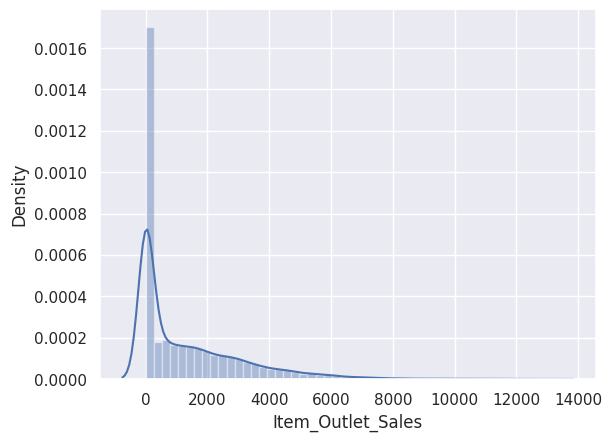

In [29]:
sns.distplot(data['Item_Outlet_Sales'])

In [30]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Skewness: 1.544684
Kurtsis: 2.419439


In [31]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [32]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [33]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

**Target** **Variable**

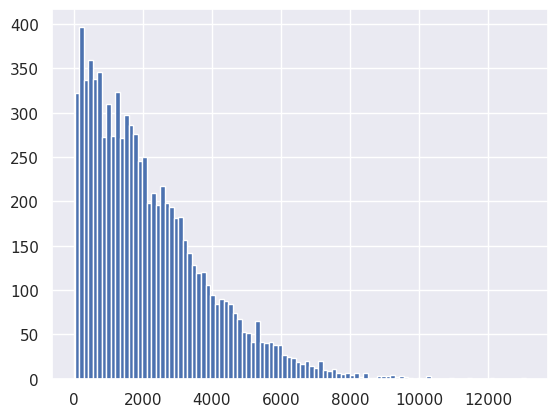

In [34]:
train['Item_Outlet_Sales'].hist(bins = 100);

**Independent Variables (numeric variables)**

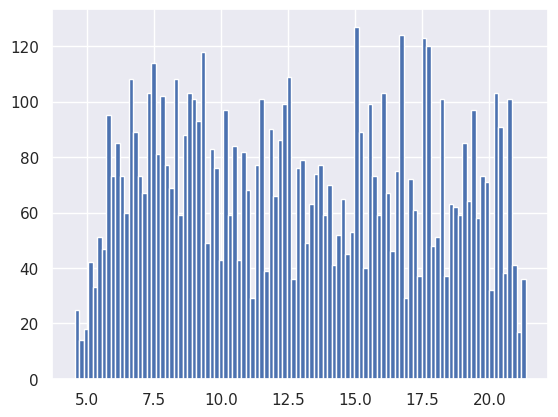

In [35]:
train['Item_Weight'].hist(bins = 100);

<Axes: >

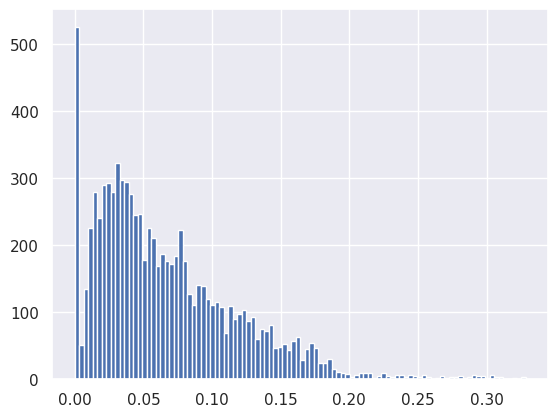

In [36]:
train['Item_Visibility'].hist(bins = 100)

<Axes: >

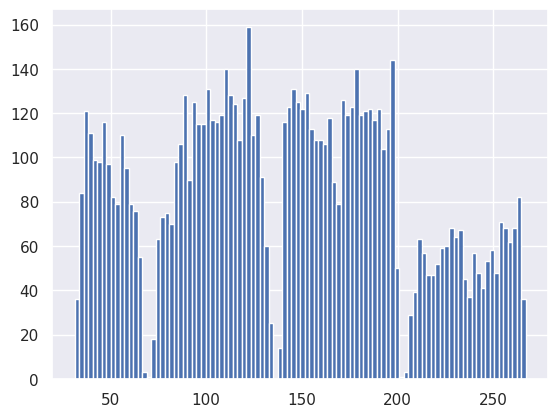

In [37]:
train['Item_MRP'].hist(bins = 100)

**Independent Variables (categorical variables)**

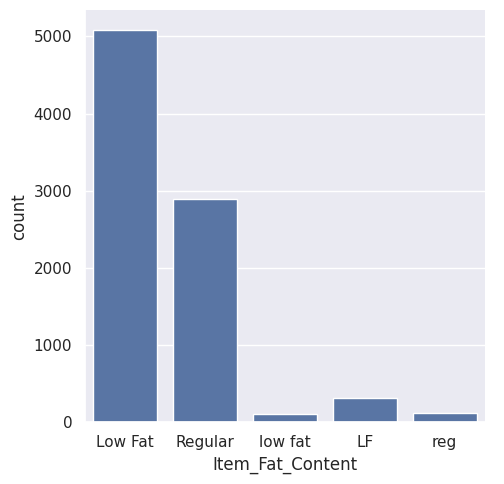

In [38]:
import seaborn as sns
sns.catplot(x="Item_Fat_Content", kind="count", data=train);

In [39]:
train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

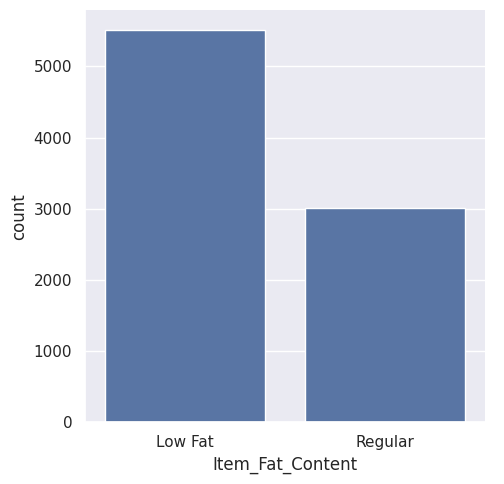

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='Item_Fat_Content', kind='count', data=train)
plt.show()

**Now lets check other categorical variables**

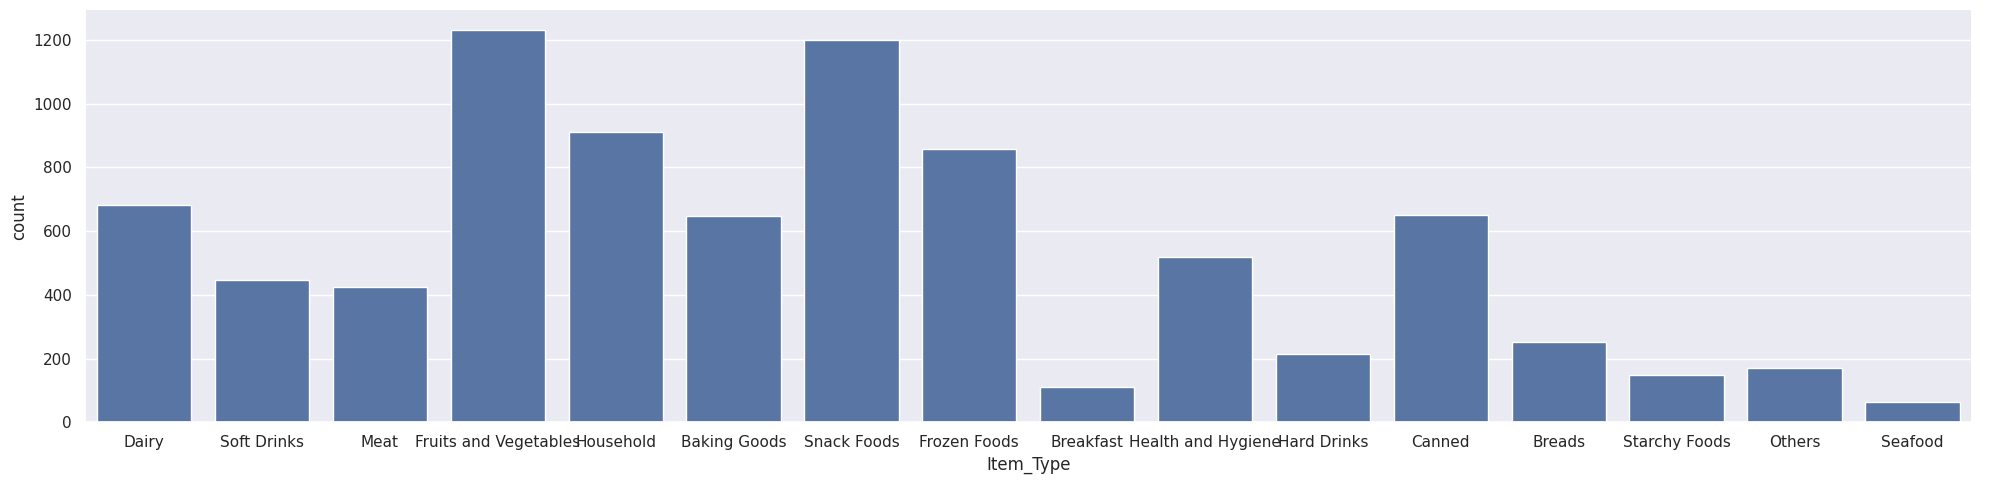

In [43]:
sns.catplot(x='Item_Type', kind='count', data=train, aspect=4)
plt.show()

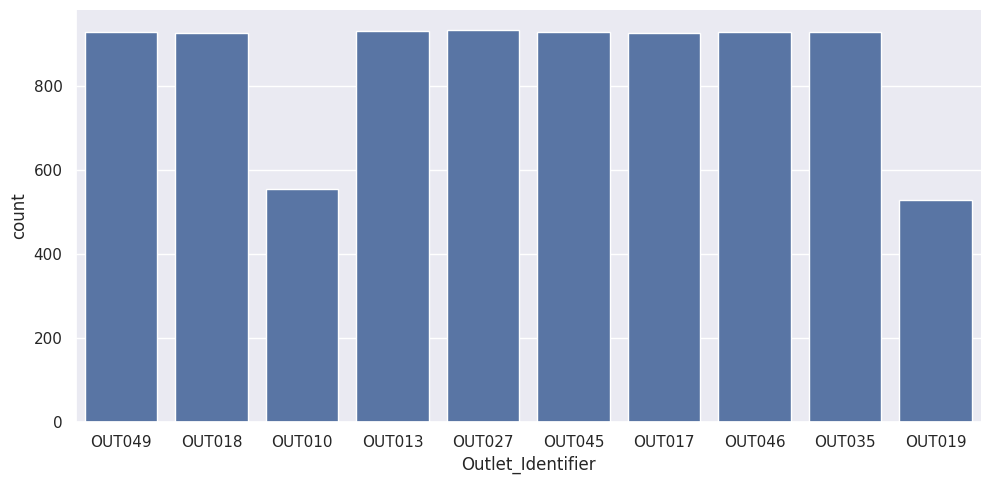

In [45]:
sns.catplot(x='Outlet_Identifier', kind='count', data=train, aspect=2)
plt.show()

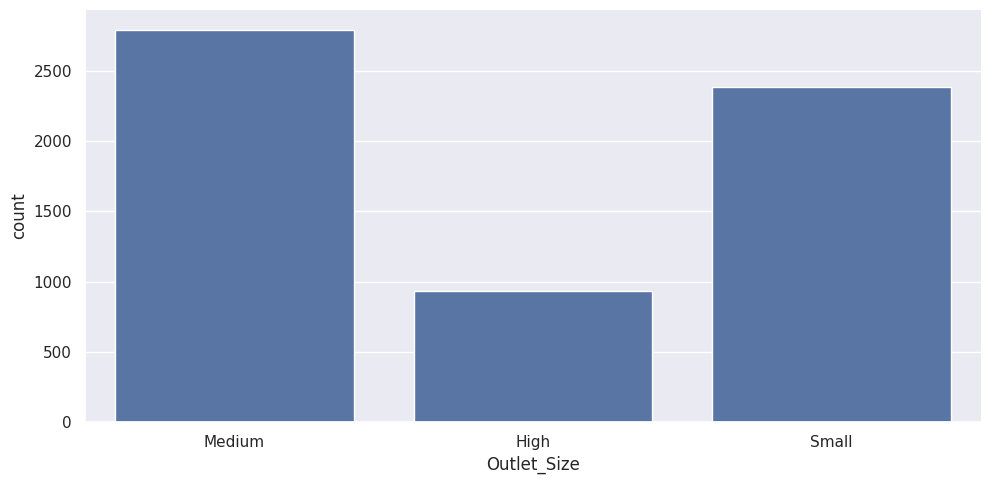

In [47]:
sns.catplot(x='Outlet_Size', kind='count', data=train, aspect=2)
plt.show()

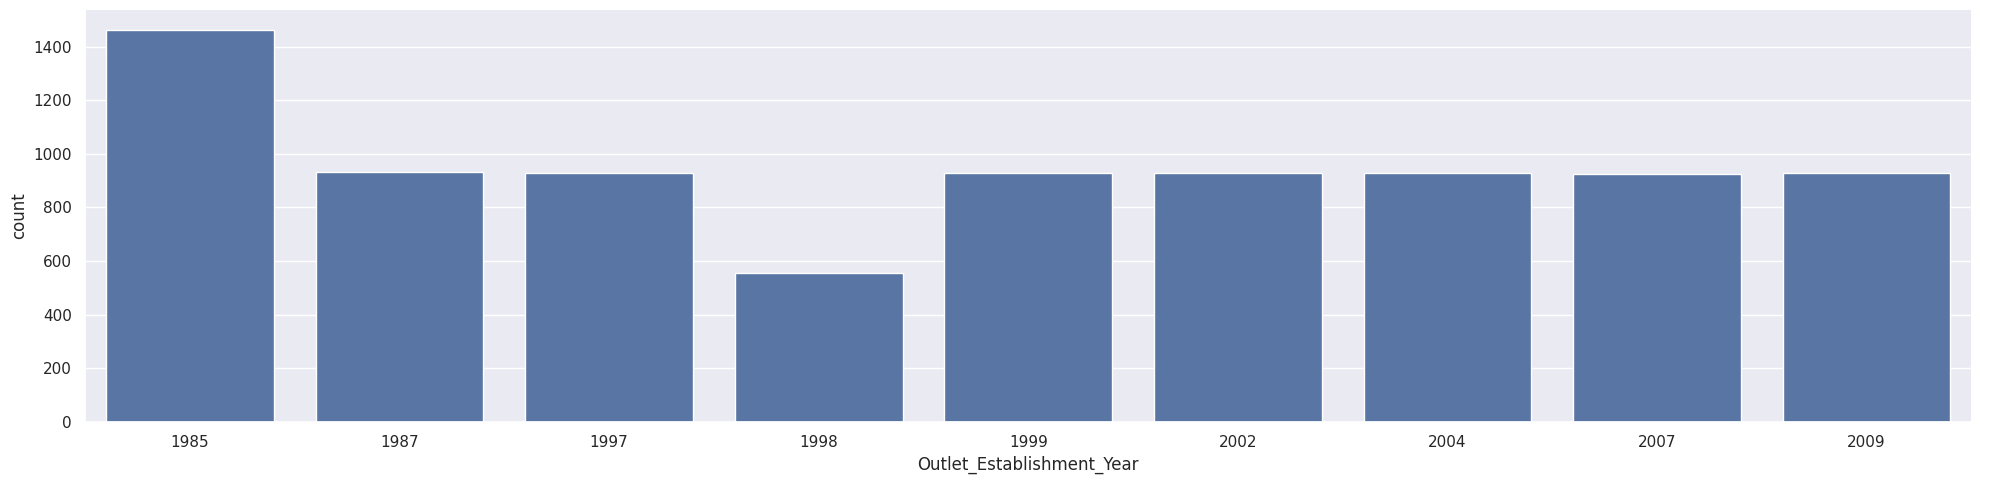

In [48]:
sns.catplot(x='Outlet_Establishment_Year', kind='count', data=train, aspect=4)
plt.show()

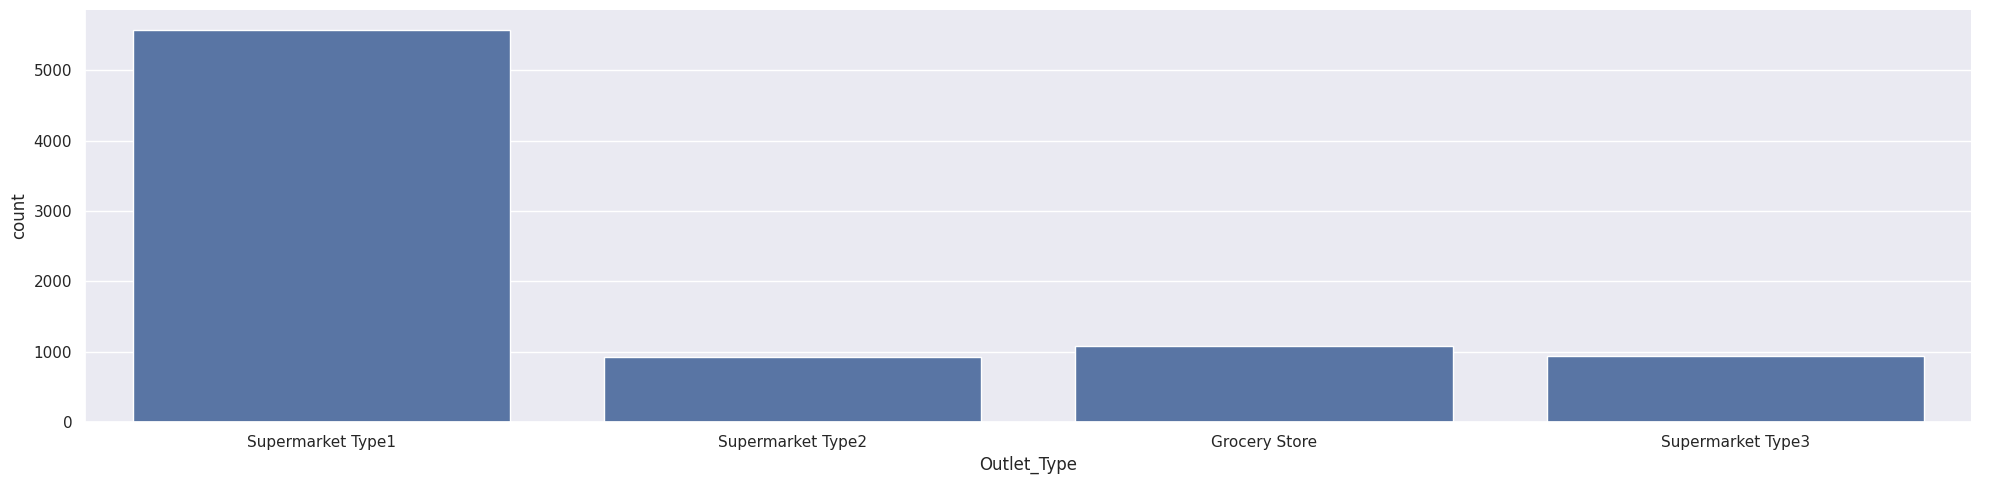

In [49]:
sns.catplot(x='Outlet_Type', kind='count', data=train, aspect=4)
plt.show()

**Target Variable vs Independent Numerical Variables**

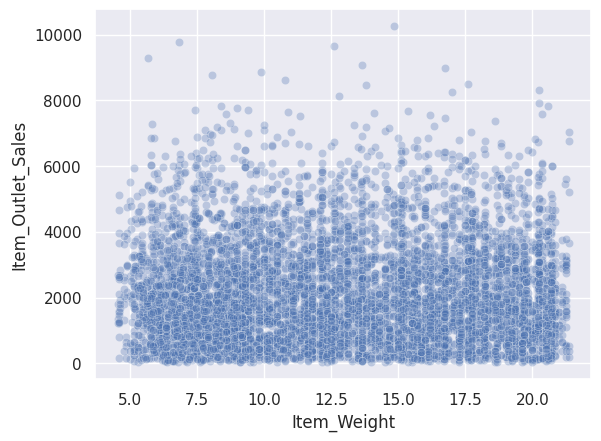

In [50]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = train,alpha = 0.3);

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

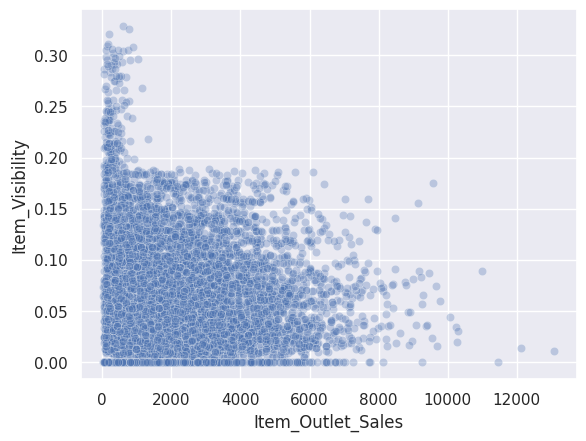

In [51]:
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = train,alpha = 0.3)

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

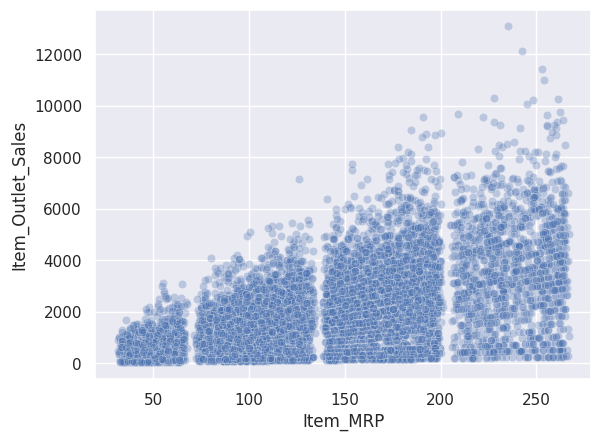

In [52]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = train,alpha = 0.3)

**Target Variable vs Independent Categorical Variables**

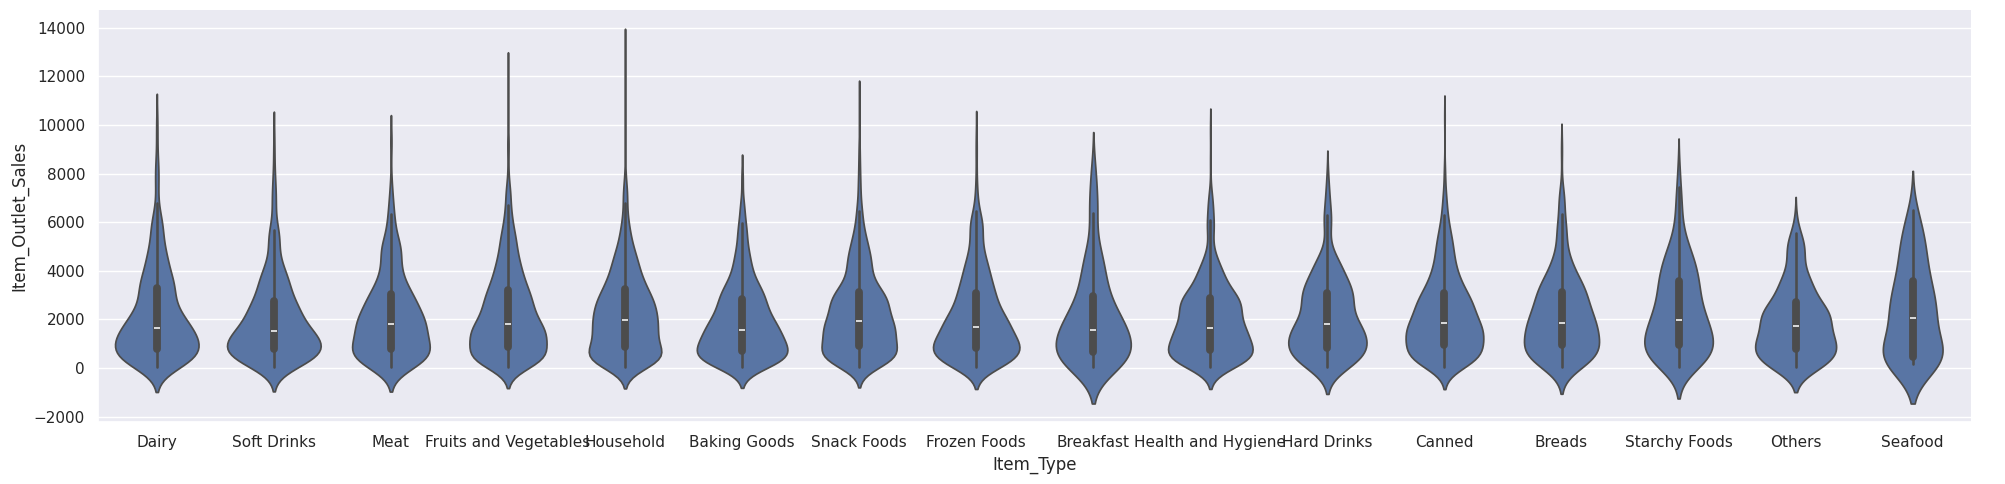

In [53]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'violin',data = train,aspect=4)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

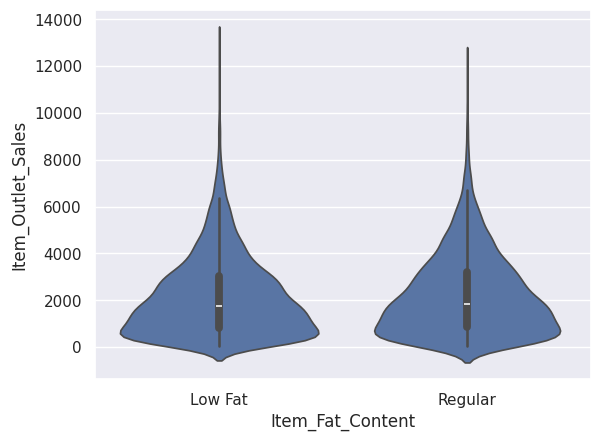

In [55]:
sns.violinplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = train)

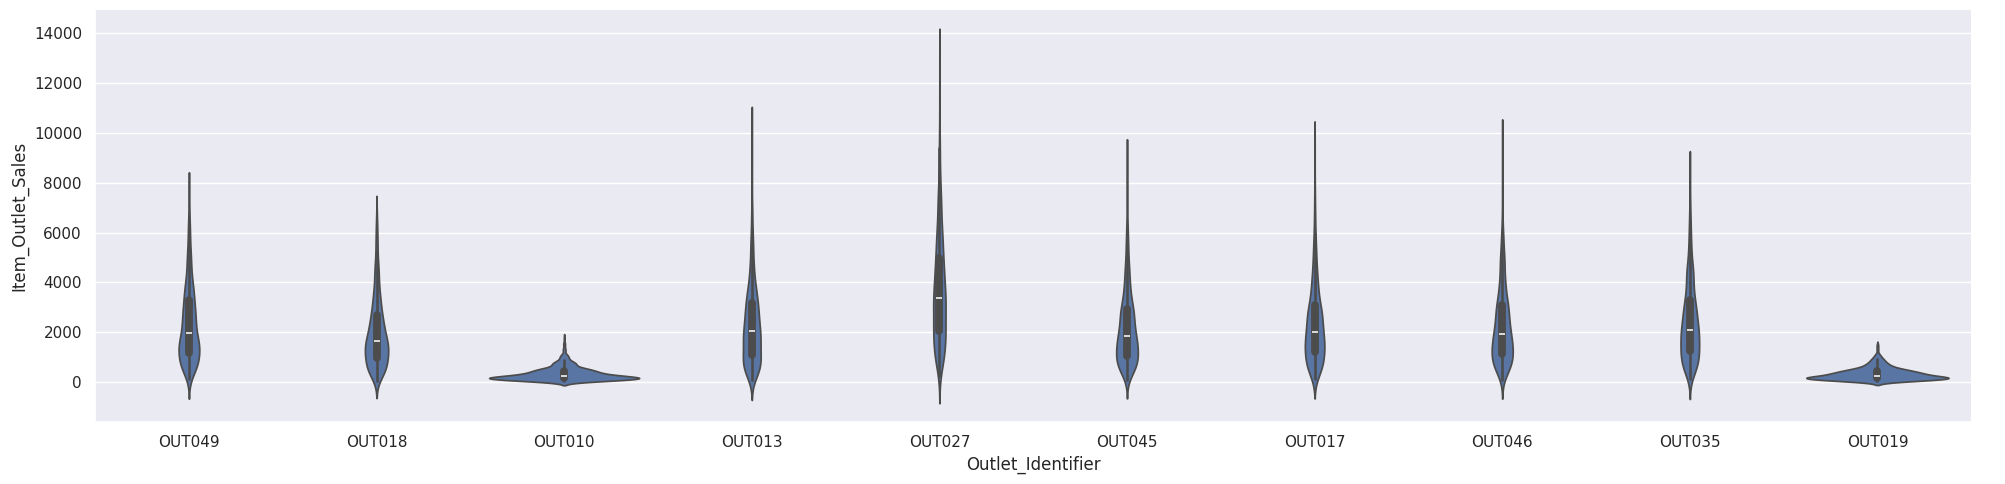

In [57]:
sns.catplot(x='Outlet_Identifier', y='Item_Outlet_Sales', kind='violin', data=train, aspect=4)
plt.show()

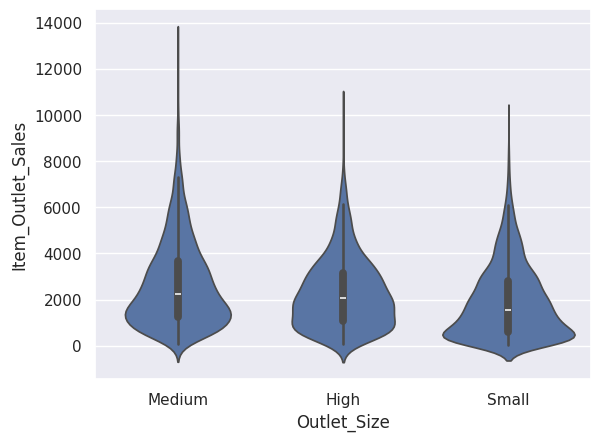

In [59]:
sns.violinplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train)
plt.show()

In [60]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

**Imputing Missing Value**

In [61]:
from sklearn.preprocessing import LabelEncoder
l_enc  = LabelEncoder()
a = l_enc.fit_transform(train['Item_Identifier'])

In [62]:
a

array([ 156,    8,  662, ..., 1357,  681,   50])

In [63]:
train['Item_Weight'].fillna(a.mean(),inplace = True)

In [64]:
train.Item_Weight.isna().sum()

0

In [65]:
train['Outlet_Size'].fillna('Small',inplace  = True)

In [66]:
train['Outlet_Size'].isna().sum()

0

**Replacing 0’s in Item_Visibility variable**

<Axes: ylabel='Frequency'>

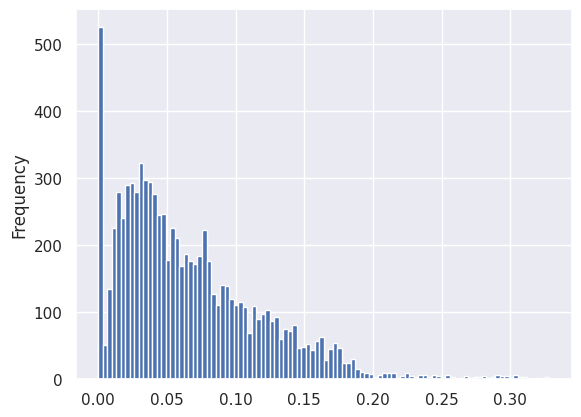

In [67]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [68]:
train.shape

(8523, 13)

In [69]:
a= train[train['Item_Visibility']!=0]['Item_Visibility'].mean()

In [70]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,a)

<Axes: ylabel='Frequency'>

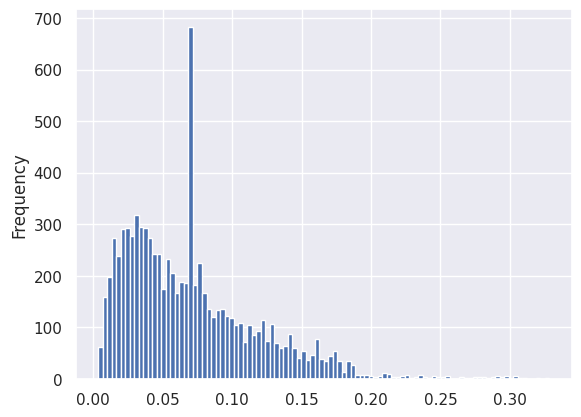

In [71]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

**Feature Engineering**

In [72]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

In [73]:
item_list =[]
for i in train['Item_Type']:
    if i in perishable:
        item_list.append('perishable')
    elif (i in non_perishable):
        item_list.append('non_perishable')
    else:
        item_list.append('not_sure')

train['Item_Type_new'] = item_list

In [74]:
train['Item_Category'] =train['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR','^FD[A-Z]*[0-9]*':'FD','^NC[A-Z]*[0-9]*':'NC'},regex = True)

In [75]:
Food=pd.crosstab(train['Item_Type'],train['Item_Category'])
Food

Item_Category,DR,FD,NC
Item_Type,,,
Baking Goods,0,648,0
Breads,0,251,0
Breakfast,0,110,0
Canned,0,649,0
Dairy,140,542,0
Frozen Foods,0,856,0
Fruits and Vegetables,0,1232,0
Hard Drinks,214,0,0
Health and Hygiene,0,0,520


In [76]:
train['Item_Fat_Content'][(train['Item_Category']=='NC')]='Non Edible'

In [77]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

In [78]:
train['Outlet_Years'] = 2019-train['Outlet_Establishment_Year']

In [79]:
train['Price_Per_Unit_Weight'] = train['Item_MRP']/train['Item_Weight']

In [80]:
def clusters(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'
train['Item_MRP_Clusters'] = train['Item_MRP'].astype('int').apply(clusters)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_new,Item_Category,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,perishable,FD,20,26.861204,4th
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,non_perishable,DR,10,8.153581,1st
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,perishable,FD,20,8.092457,3rd
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,perishable,FD,21,9.484115,3rd
4,NCD19,8.93,Non Edible,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,non_perishable,NC,32,6.031512,1st


In [81]:
train['Item_MRP_Clusters'].unique()

array(['4th', '1st', '3rd', '2nd'], dtype=object)

**Label encoding for the categorical variables**

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
le = LabelEncoder()
train['Outlet_Size']= le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_MRP_Clusters'] = le.fit_transform(train['Item_MRP_Clusters'])

**One hot encoding for the categorical variable**

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
 13  Item_Type_new              8523 non-null   objec

In [85]:
a = pd.get_dummies(train[['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category']])
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category','source'],axis = 1 )
train = pd.concat([train,a],axis = 1)

**PreProcessing Data**

Removing Skewness

In [86]:
train['Price_Per_Unit_Weight'] = np.log(train['Price_Per_Unit_Weight'])
train['Item_Visibility'] = np.log(train['Item_Visibility'])

**Correlated Variables**

In [87]:
corr = train.corr()
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years,Price_Per_Unit_Weight,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
Item_Weight,1.000000,-0.003317,0.066080,-0.008383,-0.697827,-0.061976,0.092652,0.080829,0.697827,-0.931502,...,0.319613,-0.626303,-0.159086,0.771038,-0.016239,0.001699,0.015956,-0.014775,0.010002,-0.000490
Item_Fat_Content,-0.003317,1.000000,0.022764,0.008594,0.001451,-0.000829,0.000958,0.015249,-0.001451,0.007066,...,0.000742,-0.001443,0.001810,-0.000399,-0.039354,-0.012913,0.052585,-0.257054,0.116740,0.057458
Item_Visibility,0.066080,0.022764,1.000000,-0.001259,-0.051790,0.074313,-0.018024,-0.097821,0.051790,-0.061003,...,0.220199,-0.113338,-0.021623,-0.040640,-0.042096,-0.003787,0.048058,-0.000217,0.071544,-0.082243
Item_MRP,-0.008383,0.008594,-0.001259,1.000000,0.005020,0.000872,0.000232,0.567574,-0.005020,0.301232,...,-0.004277,0.004885,0.003850,-0.006714,-0.056826,0.028963,0.037030,-0.051733,0.029315,0.004859
Outlet_Establishment_Year,-0.697827,0.001451,-0.051790,0.005020,1.000000,0.425534,-0.089216,-0.049135,-1.000000,0.649372,...,-0.281196,0.245070,0.466336,-0.538072,0.011359,0.005425,-0.016566,0.009441,-0.002312,-0.004385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Item_Type_new_not_sure,0.001699,-0.012913,-0.003787,0.028963,0.005425,0.000402,-0.004614,0.018100,-0.005425,0.003193,...,-0.006228,0.002164,0.003768,-0.000412,-0.463202,1.000000,-0.322369,-0.149661,0.175873,-0.090831
Item_Type_new_perishable,0.015956,0.052585,0.048058,0.037030,-0.016566,-0.007977,0.002475,0.024315,0.016566,-0.007846,...,0.015642,-0.015081,-0.000764,0.007042,-0.689617,-0.322369,1.000000,-0.102429,0.355441,-0.332921
Item_Category_DR,-0.014775,-0.257054,-0.000217,-0.051733,0.009441,0.003876,-0.005539,-0.034672,-0.009441,0.004486,...,-0.003055,0.011999,-0.003872,-0.011145,0.210390,-0.149661,-0.102429,1.000000,-0.514021,-0.154560
Item_Category_FD,0.010002,0.116740,0.071544,0.029315,-0.002312,-0.003544,-0.001713,0.031905,0.002312,0.002912,...,-0.005712,-0.003772,0.003433,0.008406,-0.467322,0.175873,0.355441,-0.514021,1.000000,-0.768023


**Model Building**

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales']

**Train - Validation Split**

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 8)

In [92]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

(6392, 1605) (2131, 1605) (6392,) (2131,)


In [93]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_new_non_perishable,Item_Type_new_not_sure,Item_Type_new_perishable,Item_Category_DR,Item_Category_FD,Item_Category_NC
4325,13.00,0,-1.873283,79.6986,1997,2,0,22,1.813303,1,...,0,1,0,0,1,0,0,0,1,0
246,12.00,0,-3.382979,179.3976,1987,0,2,32,2.704698,2,...,0,1,0,0,1,0,0,0,1,0
22,14.60,1,-3.661337,196.5084,2004,2,1,15,2.599684,2,...,0,1,0,0,1,0,0,0,0,1
4612,15.50,2,-2.065209,262.1568,1998,2,2,21,2.828103,3,...,1,0,0,0,1,0,0,0,1,0
1894,15.35,0,-4.280608,62.7168,1999,1,0,20,1.407514,0,...,0,1,0,0,1,0,0,0,1,0


**Linear Regression**

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train_scaled, y_train)
X_valid_scaled = scaler.transform(X_valid)
y_pred_linear = linear_model.predict(X_valid_scaled)
mse_linear = mean_squared_error(y_valid, y_pred_linear)
mae_linear = mean_absolute_error(y_valid, y_pred_linear)
r2_linear = r2_score(y_valid, y_pred_linear)
print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'Mean Absolute Error (Linear Regression): {mae_linear}')
print(f'R2 Score (Linear Regression): {r2_linear}')

Mean Squared Error (Linear Regression): 5.275192578512018e+28
Mean Absolute Error (Linear Regression): 20979748797130.375
R2 Score (Linear Regression): -1.6454801441340407e+22


**XGBOOST REGRESSOR**

In [117]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

xgboost_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_xgboost = xgboost_model.predict(dvalid)
mse_xgboost = mean_squared_error(y_valid, y_pred_xgboost)
mae_xgboost = mean_absolute_error(y_valid, y_pred_xgboost)
r2_xgboost = r2_score(y_valid, y_pred_xgboost)
print(f'Mean Squared Error (XGBoost): {mse_xgboost}')
print(f'Mean Absolute Error (XGBoost): {mae_xgboost}')
print(f'R2 Score (XGBoost): {r2_xgboost}')


Mean Squared Error (XGBoost): 1276070.1247462484
Mean Absolute Error (XGBoost): 788.3870921125107
R2 Score (XGBoost): 0.6019580287275732


**LASSO REGRESSOR**

In [115]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
lasso_model = Lasso(alpha=1.0, fit_intercept=True)
lasso_model.fit(X_train_scaled, y_train)
X_valid_scaled = scaler.transform(X_valid)
y_pred_lasso = lasso_model.predict(X_valid_scaled)
mse_lasso = mean_squared_error(y_valid, y_pred_lasso)
mae_lasso = mean_absolute_error(y_valid, y_pred_lasso)
r2_lasso = r2_score(y_valid, y_pred_lasso)
print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'Mean Absolute Error (Lasso): {mae_lasso}')
print(f'R2 Score (Lasso): {r2_lasso}')


Mean Squared Error (Lasso): 1760498.0563437748
Mean Absolute Error (Lasso): 980.6220868761184
R2 Score (Lasso): 0.4508514044965205


**Linear Regression**: Exhibits severe issues with extremely high errors and a highly negative R2 Score, indicating a poor fit and potential modeling challenges.

**XGBoost Regressor:** Demonstrates superior performance with significantly lower errors and a positive R2 Score (0.60), indicating a strong fit and making it the preferred model.

**Lasso Regressor:** Shows moderate performance, with relatively lower errors and a positive R2 Score (0.45), suggesting a decent fit but not as robust as XGBoost.

**THE END**